<a href="https://colab.research.google.com/github/cs20m016/cs6910-Assignment-1/blob/main/Que2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [48]:
from keras.datasets import fashion_mnist

In [49]:
(train_X,train_Y), (test_X,test_Y)= fashion_mnist.load_data()

In [50]:
train_X.shape, train_Y.shape

((60000, 28, 28), (60000,))

In [51]:
train_X = train_X[:]/255
test_Y = test_Y[:]/255

In [52]:
train_X=[train_X[i].flatten() for i in range(len(train_X))]
test_X=[test_X[i].flatten() for i in range(len(test_X))]

In [53]:
np.shape(train_X), np.shape(train_Y), np.shape(test_X), np.shape(test_Y)

((60000, 784), (60000,), (10000, 784), (10000,))

In [54]:
train_samples=len(train_X)
test_samples=len(test_X)
xlen=len(train_X[0])
print(xlen)

784


In [68]:
#N: number of inputs
#N = input()
N = 5
#L: number of layers
#L = input()
L = 3
#H = number of hidden layers
Hid = L-1
#K = number of classes
K = 10

In [56]:
def sigmoid(a):
  h = []
  for a1 in a:
    h.append(1.0/(1.0 + np.exp(-a1)))
  return h

In [57]:
def softmax(a):
  y = []
  sum = 0
  for a1 in a:
    sum+= np.exp(a1)
  for a1 in a:
    y.append(np.exp(a1)/sum)
  return y

In [58]:
def initialize_weights(n_input, n_hidden_layer, n_output,neurons_hl):
    W = list()
    W.append([[random.random() for j in range(n_input)]for i in range(neurons_hl)])
    for i in range(n_hidden_layer-1):
        W.append([[random.random() for j in range(neurons_hl)]for i in range(neurons_hl)])
    W.append([[random.random() for j in range(neurons_hl)]for i in range(n_output)])
    return W
W=initialize_weights(len(train_X[0]),Hid,10,N)

In [59]:
def initialize_bias(n_input, n_hidden_layer, n_output,n_neurons):
    b=list()
    for i in range(n_hidden_layer):
        b.append([random.random() for i in range(n_neurons)])
    b.append([random.random() for i in range(n_output)])
    return b
b = initialize_bias(len(train_X[0]),L-1,10,N)

In [128]:
def feed_forward_prop(input,W,b,L):
  H=[]
  A=[]
  h=input
  H.append(h)
  A.append([0])
  for i in range(1,L):
      a=b[i-1]+np.matmul(W[i-1],h)
      A.append(a)
      h=sigmoid(a)
      H.append(h)
  aL=b[L-1]+np.matmul(W[L-1],h)
  A.append(aL)
  hL=softmax(aL)
  H.append(hL)
  y_hat = hL
  return H,A,y_hat

In [129]:
Y_pred = list()
for x in train_X:
  H,A,y_hat = feed_forward_prop(x,W,b,L)
  Y_pred.append(y_hat)

In [131]:
Y_pred[0]

[0.08488684533127469,
 0.04352582825066313,
 0.08246711830746253,
 0.10735452617802074,
 0.08671714639868833,
 0.13779613005345423,
 0.2689923969973623,
 0.032521596291950935,
 0.06663881336214453,
 0.08909959882897849]

In [132]:
def cmp(e):
  g=1.0/(1.0 + np.exp(-e))
  return g*(1-g)

In [133]:
def diff_sigmoid(a):
    res=[]
    for el in a:
      res.append(cmp(el))
    return res

In [134]:
def back_propogation(H,A,y_hat,label):
    W_grad=list()
    B_grad=list()
    one_hot_y=np.zeros(K)
    one_hot_y[label]+=1
    ak_grad = y_hat-one_hot_y
    for k in range(L,0,-1):
        w_grad=np.matmul(np.matrix(ak_grad).T,np.matrix(H[k-1]))
        W_grad.append(w_grad)
        B_grad.append(ak_grad)
        if k != 1:
            h_grad=np.matmul(np.transpose(W[k-1]),ak_grad)
            ak_grad=np.multiply(h_grad,diff_sigmoid(A[k-1]))
    return W_grad,B_grad
W_grad,B_grad=back_propogation(H,A,y_hat,train_Y[0])
W_grad=W_grad[::-1]
B_grad=B_grad[::-1]

In [135]:
print(np.shape(W_grad[0]))
print(np.shape(W_grad[1]))
print(np.shape(W_grad[2]))

(5, 784)
(5, 5)
(10, 5)


In [136]:
print(np.shape(B_grad[0]))
print(np.shape(B_grad[1]))
print(np.shape(B_grad[2]))

(5,)
(5,)
(10,)


In [165]:
eta=0.00001

In [146]:
y_hat

[0.11262965973600325,
 0.10501753079561849,
 0.06242532887816583,
 0.10265696435778442,
 0.11245933958830627,
 0.08319004252984254,
 0.10367444451202254,
 0.10291943100686249,
 0.11042959598518845,
 0.10459766261020557]

In [179]:
def gradient_descent():
    W= initialize_weights(xlen,L-1,K,N)
    B= initialize_bias(xlen,L-1,K,N)
    t=0
    max_iterations=5
    loss=list()
    while (t<max_iterations):
        eta_wgrad=list()
        eta_bgrad=list()
        for l in range(L):
            eta_wgrad.append(np.zeros(shape=np.shape(W[l])).tolist())
            eta_bgrad.append(np.zeros(shape=np.shape(B[l])).tolist())
        error=0.0
        for i in range(train_samples):
            H,A,y_hat=feed_forward_prop(train_X[i],W,B,L)
            prob_array = np.zeros(10)
            prob_array[train_Y[i]]=1
            sum = 0.0
            for temp in range(len(y_hat)):
              sum += -1*prob_array[temp]*math.log(y_hat[temp])
            error+=sum
            W_grad,B_grad = back_propogation(H,A,y_hat,train_Y[i])
            W_grad=W_grad[::-1]
            B_grad=B_grad[::-1]
            for l in range(L):
                eta_wgrad[l]=(np.matrix(eta_wgrad[l])+np.multiply(eta,W_grad[l])).tolist()
                eta_bgrad[l]=(eta_bgrad[l]+np.multiply(eta,B_grad[l])).tolist()
        for l in range(L):
            W[l]=(np.matrix(W[l])-np.matrix(eta_wgrad[l])).tolist()
            B[l]=np.subtract(B[l],eta_bgrad[l])       
        loss.append(error)
        t=t+1
        print('Epoch',t)
    print (loss)
    return W,B,loss

In [156]:
W,B,loss=gradient_descent()

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
[153554.3899239627, 144493.40978662984, 141020.10234783991, 139485.9974514536, 138779.13700833468]


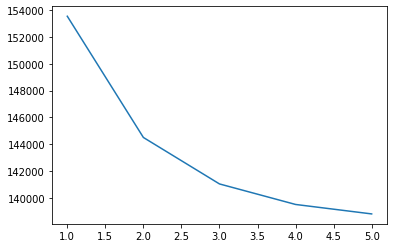

In [157]:
plt.plot([i+1 for i in range(5)],loss)

In [158]:
#Prediction
valid=0
for i in range(test_samples):
    H,A,y_hat = feed_forward_prop(test_X[i],W,B,L)
    class_predict = y_hat.index(max(y_hat))
    if(class_predict==test_Y[i]):
        valid += 1
Accuracy=valid/test_samples

In [159]:
Accuracy

0.1

In [ ]:
# stochastic gradient descent

In [180]:
def stochastic_gradient_descent():
    t=0
    max_iterations=3
    W= initialize_weights(xlen,L-1,K,N)
    B= initialize_bias(xlen,L-1,K,N)
    loss=list()
    while (t<max_iterations):
      for i in range(train_samples):
        eta_wgrad=list()
        eta_bgrad=list()
        for l in range(L):
            eta_wgrad.append(np.zeros(shape=np.shape(W[l])).tolist())
            eta_bgrad.append(np.zeros(shape=np.shape(B[l])).tolist())
            H,A,y_hat=feed_forward_prop(train_X[i],W,B,L)
            prob_array = np.zeros(10)
            prob_array[train_Y[i]]=1
            sum = 0.0
            for temp in range(len(y_hat)):
              sum += -1*prob_array[temp]*math.log(y_hat[temp])
            loss.append(sum)
            W_grad,B_grad=back_propogation(H,A,y_hat,train_Y[i])
            W_grad=W_grad[::-1]
            B_grad=B_grad[::-1]
        for l in range(L):
            eta_wgrad[l]=(np.matrix(eta_wgrad[l])+np.multiply(eta,W_grad[l])).tolist()
            eta_bgrad[l]=(eta_bgrad[l]+np.multiply(eta,B_grad[l])).tolist()
            W[l]=(np.matrix(W[l])-np.matrix(eta_wgrad[l])).tolist()
            B[l]=np.subtract(B[l],eta_bgrad[l])       
      t=t+1
      print('Epoch',t)
    print (loss)
    return W,B,loss

In [ ]:
W_s,B_s,loss_s = stochastic_gradient_descent()

Epoch 1
Epoch 2


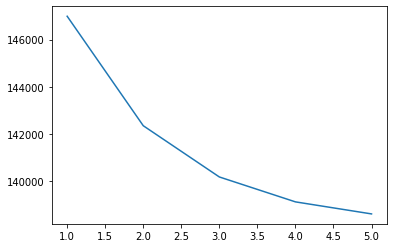

In [168]:
plt.plot([i+1 for i in range(3)],loss_s)

In [ ]:
# momentum gradient descent

In [163]:
gamma = 0.9

In [174]:
def momentum_gradient_descent():
    t=0
    max_iterations=5
    W= initialize_weights(xlen,L-1,K,N)
    B= initialize_bias(xlen,L-1,K,N)
    loss=list()
    prev_vw=list()
    prev_bw=list()
    while (t<max_iterations):
      wgrad=list()
      bgrad=list()
      for i in range(train_samples):
        for l in range(L):
            wgrad.append(np.zeros(shape=np.shape(W[l])).tolist())
            bgrad.append(np.zeros(shape=np.shape(B[l])).tolist())
            prev_vw.append(np.zeros(shape=np.shape(W[l])).tolist())
            prev_bw.append(np.zeros(shape=np.shape(B[l])).tolist())
            H,A,y_hat=feed_forward_prop(train_X[i],W,B,L)
            prob_array = np.zeros(10)
            prob_array[train_Y[i]]=1
            sum = 0.0
            for temp in range(len(y_hat)):
              sum += -1*prob_array[temp]*math.log(y_hat[temp])
            loss.append(sum)
            W_grad,B_grad=back_propogation(H,A,y_hat,train_Y[i])
            W_grad=W_grad[::-1]
            B_grad=B_grad[::-1]

        v_w = []
        v_b = []
        v_w.append(np.zeros(shape=np.shape(W[l])).tolist())
        v_b.append(np.zeros(shape=np.shape(B[l])).tolist())
        for l in range(L):
          v_w[l] = (np.multiply(gamma,prev_vw[l])+np.multiply(eta,W_grad[l])).tolist()
          v_b[l] = (np.multiply(gamma,prev_bw[l])+np.multiply(eta,B_grad[l])).tolist()
          W[l]=(np.matrix(W[l])-np.matrix(v_w[l])).tolist()
          B[l]=np.subtract(B[l],v_b[l]) 
          prev_vw[l] = v_w[l]
          prev_bw[l] = b_w[l]

      t=t+1
      print('Epoch',t)
    print (loss)
    return W,B,loss

In [ ]:
W_m,B_m,loss_m = momentum_gradient_descent()

In [ ]:
def nesterov_accelerated_gradient_descent():
    t=0
    max_iterations=5
    W= initialize_weights(xlen,L-1,K,N)
    B= initialize_bias(xlen,L-1,K,N)
    loss=list()
    while (t<max_iterations):
      for i in range(train_samples):
        wgrad=list()
        bgrad=list()
        prev_vw=list()
        prev_bw=list()
        for l in range(L):
          wgrad.append(np.zeros(shape=np.shape(W[l])).tolist())
          bgrad.append(np.zeros(shape=np.shape(B[l])).tolist())
          prev_vw.append(np.zeros(shape=np.shape(W[l])).tolist())
          prev_bw.append(np.zeros(shape=np.shape(B[l])).tolist())
          H,A,y_hat=feed_forward_prop(train_X[i],W,B,L)
          prob_array = np.zeros(10)
          prob_array[train_Y[i]]=1
          sum = 0.0
          for temp in range(len(y_hat)):
            sum += -1*prob_array[temp]*math.log(y_hat[temp])
          loss.append(sum)
          W_grad,B_grad=back_propogation(H,A,y_hat,train_Y[i])
          W_grad=W_grad[::-1]
          B_grad=B_grad[::-1]

        v_w = []
        v_b = []
        v_w.append(np.zeros(shape=np.shape(W[l])).tolist())
        v_b.append(np.zeros(shape=np.shape(B[l])).tolist())
        for l in range(L):
          v_w[l] = (np.multiply(gamma,prev_vw[l])+np.multiply(eta,W_grad[l])).tolist()
          v_b[l] = (np.multiply(gamma,prev_bw[l])+np.multiply(eta,B_grad[l])).tolist()
          W[l]=(np.matrix(W[l])-np.matrix(v_w[l])).tolist()
          B[l]=np.subtract(B[l],v_b[l]) 
          prev_vw[l] = v_w[l]
          prev_bw[l] = b_w[l]

      t=t+1
      print('Epoch',t)
    print (loss)
    return W,B,loss